## Principal Component Analysis for NBA Stats

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Preprocessing the Data for PCA

In [2]:
# Load the NBA Stats dataset
file_path = '../ETL/Final/finalized_data.csv'
a_df = pd.read_csv(file_path)
a_df.head(10)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,...,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,...,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,...,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,...,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,...,48,42,108,227,887,1997,225,1976,10,81.0
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,...,53,40,116,243,793,1997,225,1976,11,81.0
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,...,31,6,68,125,523,2001,205,1977,3,77.0
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,...,37,78,128,234,767,2002,255,1978,2,82.0
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,...,12,28,27,81,191,2002,255,1978,3,82.0
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,...,9,22,18,53,194,2002,255,1978,4,82.0


In [3]:
# List columns 
a_df.columns

Index(['Year', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA',
       '2P', '2PA', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'weight', 'year_born',
       'Status', 'height(inch)'],
      dtype='object')

In [4]:
pd.set_option('max_columns', 500)

a_df.head(10)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.067,-2.1,0.0,-2.1,-0.1,310,654,3,20,307,634,0.476,170,234,122,276,398,109,53,40,116,243,793,1997,225,1976,11,81.0
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,5.0,9.8,1.2,0.3,10.7,21.3,0.1,1.0,1.1,0.040,-3.2,-2.3,-5.5,-1.2,193,505,19,57,174,448,0.401,118,146,39,79,118,79,31,6,68,125,523,2001,205,1977,3,77.0
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,14.9,10.6,4.4,0.9,2.6,13.2,19.7,-1.7,2.6,0.9,0.018,-4.6,0.6,-3.9,-1.1,335,790,0,4,335,786,0.424,97,121,134,291,425,54,37,78,128,234,767,2002,255,1978,2,82.0
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,14.7,11.3,4.7,1.1,3.6,11.3,18.3,-0.1,0.8,0.7,0.051,-4.7,0.2,-4.6,-0.4,83,198,0,0,83,198,0.419,25,33,42,77,119,16,12,28,27,81,191,2002,255,1978,3,82.0
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,13.3,11.0,5.7,0.9,3.2,8.7,18.1,0.6,0.5,1.1,0.100,-2.0,-0.3,-2.3,0.0,84,177,0,0,84,177,0.475,26,28,40,59,99,18,9,22,18,53,194,2002,255,1978,4,82.0


In [5]:
# Verify datatypes
a_df.dtypes

Year              int64
Player           object
Age               int64
G                 int64
MP                int64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
FG                int64
FGA               int64
3P                int64
3PA               int64
2P                int64
2PA               int64
eFG%            float64
FT                int64
FTA               int64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF              

In [6]:
# Create a new DataFrame that holds only the player names.
player_name = pd.DataFrame(a_df['Player'])

print(player_name.shape)
player_name.head(10)

(6273, 1)


,Player
0,Tariq Abdul-Wahad
1,Shareef Abdur-Rahim
2,Shareef Abdur-Rahim
3,Shareef Abdur-Rahim
4,Shareef Abdur-Rahim
5,Shareef Abdur-Rahim
6,Courtney Alexander
7,Malik Allen
8,Malik Allen
9,Malik Allen


In [7]:
a_df.head()

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0


In [8]:
# Drop unused columns
df = a_df.drop(['Player', 'year_born', 'Year', 'year_start', 'Status', 'OWS', 'DWS', 'WS', 'WS/48', 'VORP', 'PER'], axis=1)
df.head(10)

,Age,G,MP,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DBPM,BPM,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height(inch)
0,28,14,204,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,-1.2,0.7,-0.5,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,223,78.0
1,26,81,3087,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,2.1,-0.4,1.7,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,225,81.0
2,27,85,2684,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,1.3,-1.0,0.3,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,225,81.0
3,28,54,1867,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,1.4,-0.5,0.8,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,225,81.0
4,29,72,1961,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,0.4,0.4,0.9,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,225,81.0
5,30,80,2015,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,-2.1,0.0,-2.1,310,654,3,20,307,634,0.476,170,234,122,276,398,109,53,40,116,243,793,225,81.0
6,25,66,1360,0.459,0.113,0.289,3.3,6.8,5.0,9.8,1.2,0.3,10.7,21.3,-3.2,-2.3,-5.5,193,505,19,57,174,448,0.401,118,146,39,79,118,79,31,6,68,125,523,205,77.0
7,24,80,2318,0.455,0.005,0.153,6.5,14.9,10.6,4.4,0.9,2.6,13.2,19.7,-4.6,0.6,-3.9,335,790,0,4,335,786,0.424,97,121,134,291,425,54,37,78,128,234,767,255,82.0
8,25,45,616,0.449,0.000,0.167,7.9,14.7,11.3,4.7,1.1,3.6,11.3,18.3,-4.7,0.2,-4.6,83,198,0,0,83,198,0.419,25,33,42,77,119,16,12,28,27,81,191,255,82.0
9,26,36,519,0.512,0.000,0.158,9.0,13.3,11.0,5.7,0.9,3.2,8.7,18.1,-2.0,-0.3,-2.3,84,177,0,0,84,177,0.475,26,28,40,59,99,18,9,22,18,53,194,255,82.0


In [9]:
# Summarize the nba_data
df.describe()

,Age,G,MP,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DBPM,BPM,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height(inch)
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,26.614220,58.027579,1368.446517,0.518046,0.224275,0.296625,5.653228,14.582544,10.114937,12.941527,1.582321,1.620979,13.908704,18.665407,-1.170333,-0.208624,-1.378734,208.986131,461.611988,38.424040,107.736490,170.562092,353.875498,0.481122,103.189224,136.151762,63.051331,175.465328,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,221.479675,79.111908
std,4.225402,20.839700,860.169059,0.062482,0.202405,0.161223,4.027958,5.680427,4.491148,9.100296,0.654119,1.593786,4.569770,4.910037,2.764516,1.776342,3.276796,168.598866,361.634063,48.650569,127.987099,147.518044,295.905395,0.063959,107.157123,134.562286,61.459045,140.726003,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,27.041645,3.547497
min,18.000000,11.000000,31.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,-16.400000,-8.200000,-17.900000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,135.000000,65.000000
25%,23.000000,43.000000,600.000000,0.487000,0.013000,0.189000,2.200000,10.000000,6.300000,6.400000,1.100000,0.500000,10.800000,15.200000,-2.900000,-1.400000,-3.300000,70.000000,162.000000,0.000000,3.000000,52.000000,116.000000,0.448000,27.000000,38.000000,19.000000,67.000000,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,200.000000,77.000000
50%,26.000000,64.000000,1325.000000,0.524000,0.209000,0.268000,4.400000,13.600000,9.200000,10.000000,1.500000,1.100000,13.300000,18.400000,-1.200000,-0.300000,-1.300000,172.000000,383.000000,16.000000,51.000000,131.000000,279.000000,0.485000,69.000000,94.000000,42.000000,145.000000,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,220.000000,80.000000
75%,30.000000,76.000000,2066.000000,0.556000,0.382000,0.371000,8.600000,18.400000,13.400000,17.300000,2.000000,2.200000,16.200000,21.800000,0.500000,0.900000,0.700000,310.000000,679.000000,64.000000,182.000000,249.000000,513.000000,0.518000,143.000000,192.000000,89.000000,243.000000,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,240.000000,82.000000
max,42.000000,85.000000,3401.000000,0.737000,0.941000,2.400000,27.200000,38.600000,27.000000,57.300000,5.900000,15.100000,57.100000,41.700000,12.400000,7.500000,15.600000,978.000000,2173.000000,402.000000,886.000000,798.000000,1655.000000,0.800000,756.000000,916.000000,440.000000,894.000000,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,308.000000,90.000000


In [10]:
# Drop Null Values
df.dropna(inplace=True)

In [11]:
# Standardize the data with StandardScaler().
nba_scaled = StandardScaler().fit_transform(df)
print(nba_scaled[0:5])

[[ 0.3279903  -2.11284658 -1.35384937 -0.76901737 -1.02413819 -1.20107237
   0.48335338 -0.10256107  0.15254842  0.27017459 -0.12586035 -0.32690739
  -0.7897534  -0.74657275 -0.01073215  0.51155514  0.26819008 -1.0794891
  -1.11616743 -0.78985926 -0.83402936 -0.97326084 -1.0033584  -0.23644875
  -0.93504946 -0.96730028 -0.79817774 -1.06218637 -1.02017107 -0.75475631
  -1.09050803 -0.71300249 -1.16265226 -1.36093778 -1.08728458  0.05622611
  -0.31345958]
 [-0.1453752   1.10242724  1.99808452  0.76753748 -0.85614517  0.9948155
   0.25989729  0.56645605  0.53110094  0.19324788 -0.12586035 -0.45240478
  -0.19886698  1.12728976  1.18306222 -0.10774447  0.93963104  2.11770302
   1.99496008 -0.35817522 -0.37300865  2.53845392  2.59943153  0.09191338
   3.28339183  3.00887064  1.82166178  2.32054273  2.25335254  0.89546911
   1.31768575  0.31142825  2.18983781  1.77032287  2.2681212   0.130192
   0.5322746 ]
 [ 0.09130755  1.29438389  1.52953462  0.62348546 -0.95002362  0.68466184
   0.6323241

### Reducing Data Dimensions Using PCA

In [12]:
# Determine number of components by calculating variances
variances = []
for n in range(1,nba_scaled.shape[1]):
    pca = PCA(n_components=n)
    pca.fit(nba_scaled)
    variances.append(sum(pca.explained_variance_ratio_))

In [13]:
variances

[0.4044652078321691,
 0.6272581878602165,
 0.6944456471746117,
 0.7492549966899107,
 0.7920682576026291,
 0.8213424750541556,
 0.8491988296977346,
 0.8738554513972009,
 0.8953148787581674,
 0.9148744058648445,
 0.9291937341395788,
 0.9414965843728725,
 0.9518942601765091,
 0.9603862062974735,
 0.9675356443194523,
 0.9730979361028869,
 0.9777248257609207,
 0.9818564010793231,
 0.9853974358802439,
 0.9885081586069966,
 0.9910590480698066,
 0.9931756402758354,
 0.9950341862643628,
 0.9962848450628216,
 0.9972700320342519,
 0.9981878172221349,
 0.9988891095289015,
 0.9994401934372255,
 0.9996830327405198,
 0.9998599747602078,
 0.9999862370646828,
 0.9999970067399412,
 1.0,
 1.0,
 1.0,
 1.0]

In [14]:
# Using PCA to reduce dimension to 10 principal components.
n_comp = 10

pca = PCA(n_components=n_comp)

nba_pca = pca.fit_transform(nba_scaled)

nba_pca

array([[-4.41355636,  0.07832139, -0.18958321, ..., -1.44385479,
         0.43950128, -0.38339436],
       [ 8.26780448,  1.59632868,  2.10819882, ..., -0.90058433,
        -1.00484444,  0.43767754],
       [ 6.60244613,  2.05600134,  1.82943504, ..., -1.28928512,
        -1.00944734,  0.01829942],
       ...,
       [-5.99819818,  2.87370785,  1.882273  , ...,  1.10864248,
         0.22661594, -0.6596183 ],
       [-3.07688914, -0.57488537, -0.91304489, ...,  0.79259309,
         0.74356786, -0.24225806],
       [-2.31917452,  3.07323283, -0.74162349, ...,  0.27475142,
         1.52514038, -0.92512098]])

In [15]:
# Create New Dataframe with the princiapl components
pcs_df = pd.DataFrame(data=nba_pca, columns=[f'PC {x}' for x in range(n_comp)], index=player_name.index)

print(pcs_df.shape)
pcs_df.head(10)

(6273, 10)


,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-4.413556,0.078321,-0.189583,-0.433234,0.339568,1.320712,0.761382,-1.443855,0.439501,-0.383394
1,8.267804,1.596329,2.108199,1.268509,0.861045,-0.683419,0.181823,-0.900584,-1.004844,0.437678
2,6.602446,2.056001,1.829435,1.543084,0.553437,-0.864678,0.205474,-1.289285,-1.009447,0.018299
3,2.726639,1.324739,0.228502,0.595880,1.345219,-0.236388,0.459041,-1.161916,-0.502839,0.049071
4,3.036963,1.495009,0.097906,0.008393,0.947972,-1.070905,0.160097,-1.085234,-0.106355,0.930070
5,2.363239,1.809499,0.928228,0.608187,-0.639288,-1.383101,0.159950,-0.925344,-0.577636,0.656428
6,-1.207520,-1.781138,1.582191,1.998406,-0.277003,-0.843036,-0.830211,-0.710030,-0.270296,1.139599
7,1.834866,2.727494,1.594874,1.977695,-2.455390,-1.152993,-0.996887,-0.386714,0.857817,0.313328
8,-3.503607,1.974000,0.624443,1.328549,-0.774706,0.594248,-0.166728,0.040472,0.815756,0.359570
9,-3.310451,1.731011,-0.677136,1.242710,0.428293,0.709220,0.140597,-0.741152,0.921432,0.225167


### Clustering Using K-Means

In [16]:
# Calculate the inertia for the range of K values
inertias = []
for k in range(1,20):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pcs_df)
    inertias.append(model.inertia_)

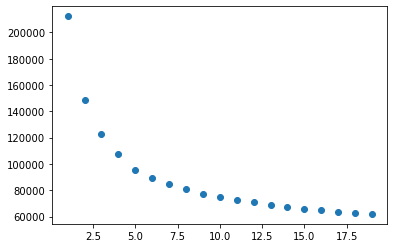

In [17]:
plt.scatter(range(1,20),inertias)

In [18]:
secondDeriv = [0]
for i in range(1,18):
    secondDeriv.append(inertias[i+1] + inertias[i-1] - 2*inertias[i])
secondDeriv.append(0)

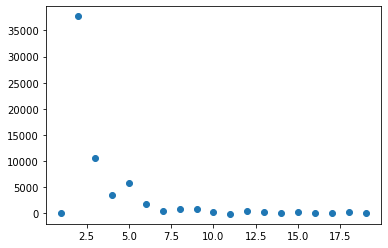

In [19]:
plt.scatter(range(1,20),secondDeriv)

In [20]:
secondDeriv

[0,
 37712.28570447059,
 10508.709336743079,
 3441.8759832138894,
 5774.064124064986,
 1791.4363654397603,
 399.02862673954223,
 788.5387648120522,
 795.0828864393698,
 330.7659077268909,
 -102.32939830300165,
 463.3016344505304,
 274.2082997823891,
 115.0565867216792,
 170.84211315095308,
 104.08615906977502,
 44.693356620075065,
 254.2600546956528,
 0]

In [21]:
# Initialize the K-Means model.
model = KMeans(n_clusters=9, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([4, 8, 8, ..., 0, 5, 6])

<AxesSubplot:xlabel='cluster', ylabel='VORP'>

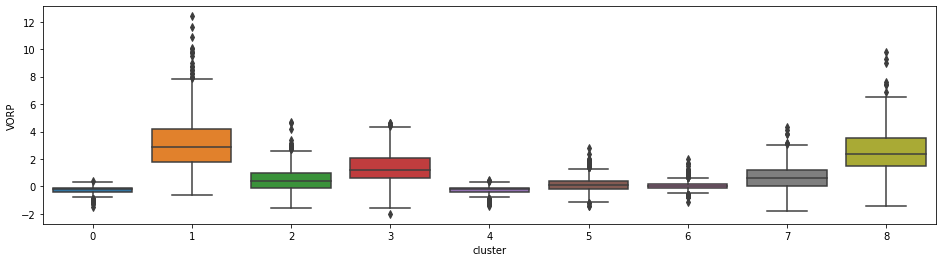

In [22]:
# Visualize clusters based on VORP
import seaborn as sns

cluster_df = pd.DataFrame(predictions, columns=['cluster'])
cluster_vorp = cluster_df.join(a_df)

plt.figure(figsize=(16,4))
sns.boxplot(cluster_vorp['cluster'], cluster_vorp['VORP'])

<AxesSubplot:xlabel='cluster', ylabel='WS'>

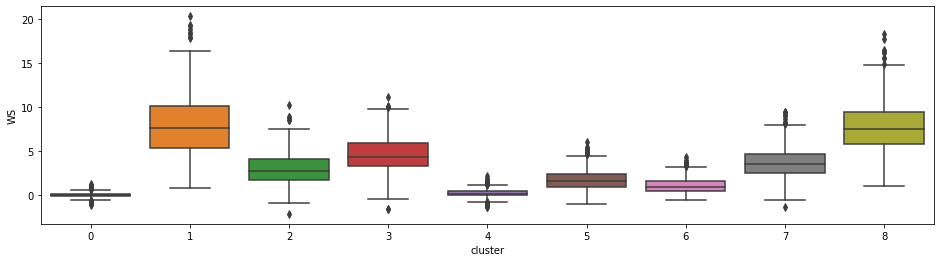

In [23]:
# Visualize clusters based on WS
cluster_df = pd.DataFrame(predictions, columns=['cluster'])
cluster_ws = cluster_df.join(a_df)

plt.figure(figsize=(16,4))
sns.boxplot(cluster_vorp['cluster'], cluster_vorp['WS'])

In [24]:
cluster_vorp.groupby('cluster').describe()

Year                                                          \
         count         mean       std     min     25%     50%      75%   
cluster                                                                  
0        519.0  2009.157996  4.168517  2003.0  2006.0  2009.0  2013.00   
1        464.0  2009.644397  4.296346  2003.0  2006.0  2009.0  2013.00   
2        723.0  2009.860304  4.314328  2003.0  2006.0  2010.0  2014.00   
3        682.0  2011.123167  4.245695  2003.0  2008.0  2011.0  2015.00   
4        852.0  2010.095070  4.385547  2003.0  2006.0  2010.0  2014.00   
5        932.0  2011.232833  4.159608  2003.0  2008.0  2012.0  2015.00   
6        844.0  2009.973934  4.207465  2003.0  2006.0  2010.0  2013.25   
7        816.0  2009.799020  4.307084  2003.0  2006.0  2010.0  2014.00   
8        441.0  2009.882086  4.316424  2003.0  2006.0  2010.0  2014.00   

                   Age                                                     \
            max  count       mean       std   min   25%   50%   75%   max   
cluster                                                                     
0        2017.0  519.0  26.500963  4.738683  18.0  23.0  25.0  30.0  42.0   
1        2017.0  464.0  26.204741  3.482616  19.0  24.0  26.0  28.0  36.0   
2        2017.0  723.0  26.947441  4.085649  19.0  24.0  27.0  30.0  39.0   
3        2017.0  682.0  26.963343  3.961652  19.0  24.0  26.5  29.0  40.0   
4        2017.0  852.0  26.514085  4.665904  18.0  23.0  25.0  30.0  39.0   
5        2017.0  932.0  26.984979  4.294201  19.0  23.0  26.0  30.0  40.0   
6        2017.0  844.0  26.654028  4.367324  18.0  23.0  26.0  30.0  41.0   
7        2017.0  816.0  26.279412  4.043065  19.0  23.0  26.0  29.0  39.0   
8        2017.0  441.0  26.045351  3.777052  19.0  23.0  26.0  28.0  38.0   

             G                                                           MP  \
         count       mean        std   min    25%   50%    75%   max  count   
cluster                                                                       
0        519.0  29.007707  14.240757  11.0  18.00  26.0  37.00  81.0  519.0   
1        464.0  75.439655   7.282084  46.0  73.00  78.0  81.00  82.0  464.0   
2        723.0  68.384509  11.853743  25.0  61.00  71.0  79.00  83.0  723.0   
3        682.0  74.316716   8.004183  40.0  71.00  76.0  81.00  83.0  682.0   
4        852.0  37.041080  16.627797  11.0  23.00  36.0  50.00  80.0  852.0   
5        932.0  59.321888  14.738736  13.0  50.00  62.0  71.00  84.0  932.0   
6        844.0  42.933649  17.128857  11.0  29.00  44.0  56.00  82.0  844.0   
7        816.0  70.361520   9.747509  29.0  64.75  72.0  78.25  82.0  816.0   
8        441.0  75.564626   7.035690  44.0  72.00  78.0  81.00  85.0  441.0   

                                                                            \
                mean         std     min      25%     50%      75%     max   
cluster                                                                      
0         292.633911  218.738779    31.0   125.50   231.0   390.50  1320.0   
1        2707.428879  345.239028  1412.0  2486.75  2762.5  2955.00  3401.0   
2        1779.437068  426.376756   732.0  1472.00  1760.0  2087.50  3118.0   
3        2198.052786  384.296531  1286.0  1914.25  2189.5  2468.00  3240.0   
4         488.349765  299.219226    33.0   245.50   426.0   692.25  1508.0   
5        1127.244635  400.336314   128.0   850.00  1132.0  1419.50  2464.0   
6         593.321090  313.150849    39.0   347.25   586.0   832.00  1844.0   
7        1621.491422  375.456466   739.0  1332.00  1594.0  1897.75  2839.0   
8        2494.263039  334.765506  1530.0  2256.00  2501.0  2718.00  3373.0   

           PER                                                         TS%  \
         count       mean       std   min     25%   50%   75%   max  count   
cluster                                                                      
0        519.0   6.946821  3.813847  -9.1   4.800   7.3   9.6  19.4  519.0  

### Creating Cluster Dataset

In [25]:
# Check clusters
model.labels_

array([4, 8, 8, ..., 0, 5, 6])

In [26]:
# Add clusters to original df
a_df['cluster'] = model.labels_
a_df

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch),cluster
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0,4
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0,8
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0,8
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0,7
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2017,Troy Williams,22,30,557,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73,167,18,62,55,105,0.491,21,32,15,54,69,25,27,10,33,60,185,2017,218,1994,1,79.0,4
6269,2017,Kyle Wiltjer,24,14,44,6.7,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-0.1,0.1,0.0,-0.039,-4.0,0.0,-4.0,0.0,4,14,4,13,0,1,0.429,1,2,4,6,10,2,3,1,5,4,13,2017,240,1992,1,82.0,0
6270,2017,Stephen Zimmerman,20,19,108,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10,31,0,0,10,31,0.323,3,5,11,24,35,4,2,5,3,17,23,2017,240,1996,1,84.0,0
6271,2017,Paul Zipser,22,44,843,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88,221,33,99,55,122,0.473,31,40,15,110,125,36,15,16,40,78,240,2017,215,1994,1,80.0,5


In [27]:
# Determine max status
max(a_df["Status"])

21

In [28]:
# Create new df with correct column headers
cols = ["Player","year_born"]
for i in range(1,22):
    cols.extend([f"Cluster {i}",f"VORP {i}",f"WS {i}"])
b_df = pd.DataFrame(columns = cols)
b_df.head()

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,VORP 10,WS 10,Cluster 11,VORP 11,WS 11,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21


In [29]:
# Create loop that fills in the data from original df
for index, row in a_df.iterrows():
    subset = a_df[(a_df["Player"]==row["Player"]) & (a_df["year_born"]==row["year_born"])]
    if (subset["Player"].iloc[0],subset["year_born"].iloc[0]) not in zip(b_df["Player"],b_df["year_born"]):
        new_row = {}
        new_row["Player"] = subset["Player"].iloc[0]
        new_row["year_born"] = subset["year_born"].iloc[0]
        for index2, sub in subset.iterrows():
            new_row[f"Cluster {sub['Status']}"] = sub["cluster"]
            new_row[f"VORP {sub['Status']}"] = sub["VORP"]
            new_row[f"WS {sub['Status']}"] = sub["WS"]
        b_df = b_df.append(new_row,ignore_index=True)

In [30]:
b_df

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,VORP 10,WS 10,Cluster 11,VORP 11,WS 11,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21
0,Tariq Abdul-Wahad,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shareef Abdur-Rahim,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.8,9.7,8.0,1.6,8.1,7.0,1.3,5.4,7.0,1.4,6.2,7.0,-0.1,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Courtney Alexander,1977,NaN,NaN,NaN,NaN,NaN,NaN,5.0,-1.2,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malik Allen,1978,NaN,NaN,NaN,7.0,-1.1,0.9,0.0,-0.4,0.7,6.0,0.0,1.1,6.0,-0.3,1.0,0,-0.5,1.0,5.0,-0.5,1.0,0.0,-0.4,0.3,0.0,-0.3,0.1,0.0,-0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ray Allen,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.2,9.1,1.0,3.3,6.9,1.0,4.4,10.7,1.0,4.2,9.5,1.0,3.0,6.3,3.0,3.4,9.7,3.0,4.3,11.1,3.0,2.6,7.9,3.0,4.1,10.0,5.0,1.8,4.7,3.0,1.1,5.4,3.0,1.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Troy Williams,1994,4.0,-0.1,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Kyle Wiltjer,1992,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,Stephen Zimmerman,1996,0.0,-0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,Paul Zipser,1994,5.0,-0.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Save the DataFrame and will be use in the timeseries
b_df.to_csv('Resources/clustered_dataset.csv', index=False)

## Finding Cluster types

In [32]:
pcs_df

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-4.413556,0.078321,-0.189583,-0.433234,0.339568,1.320712,0.761382,-1.443855,0.439501,-0.383394
1,8.267804,1.596329,2.108199,1.268509,0.861045,-0.683419,0.181823,-0.900584,-1.004844,0.437678
2,6.602446,2.056001,1.829435,1.543084,0.553437,-0.864678,0.205474,-1.289285,-1.009447,0.018299
3,2.726639,1.324739,0.228502,0.595880,1.345219,-0.236388,0.459041,-1.161916,-0.502839,0.049071
4,3.036963,1.495009,0.097906,0.008393,0.947972,-1.070905,0.160097,-1.085234,-0.106355,0.930070
...,...,...,...,...,...,...,...,...,...,...
6268,-3.418445,-0.870159,-0.326100,-0.758790,0.063416,1.245108,-1.281629,0.158030,0.312311,-0.029173
6269,-5.501041,-0.243123,0.381313,-1.137703,-0.306767,2.451159,-0.032498,1.594554,-0.469449,-1.650349
6270,-5.998198,2.873708,1.882273,2.201838,-1.409255,2.193744,-0.070287,1.108642,0.226616,-0.659618
6271,-3.076889,-0.574885,-0.913045,0.732725,-0.603349,-0.230963,-0.797823,0.792593,0.743568,-0.242258


In [33]:
# Finding cluster centers
model.cluster_centers_

array([[-5.03075127e+00,  9.61570452e-01,  1.41146184e+00,
         1.12087962e+00, -5.35556099e-01,  5.18802796e-01,
         5.39699001e-01,  6.07244459e-01, -1.75242850e-01,
         5.21080376e-03],
       [ 7.05906689e+00, -2.68674184e+00,  1.12338108e+00,
         8.76232043e-02,  9.28468899e-01,  4.39404019e-01,
         5.04736460e-01,  5.75706960e-01, -2.64384760e-02,
         1.74165208e-01],
       [ 1.28425619e+00, -3.01367882e+00,  7.20732214e-01,
        -8.90337928e-01,  8.18596234e-02, -4.95513541e-01,
        -1.22421696e-01, -1.55471004e-01,  1.45690673e-01,
        -1.45464988e-01],
       [ 2.72103459e+00, -1.39794536e+00, -1.59933244e+00,
         5.39638065e-01, -7.10456203e-01,  9.14006520e-02,
        -7.09996666e-02,  6.00666230e-01, -3.43555914e-01,
         8.37148446e-02],
       [-3.89629507e+00, -2.18015066e+00,  7.96891646e-01,
        -2.30612780e-01,  4.41825690e-02,  4.52710497e-02,
        -1.59402569e-01, -4.62100012e-01,  2.65175360e-01,
        -3.

In [34]:
# Determining cluster components
pca.components_

array([[-0.00857863,  0.1971771 ,  0.24547149,  0.13248581, -0.00644652,
         0.03002753, -0.01426161,  0.03714815,  0.01764866,  0.09042095,
         0.03353844,  0.00089247, -0.06164088,  0.13826363,  0.19698134,
         0.05788295,  0.19757292,  0.24991506,  0.24609089,  0.1371467 ,
         0.14136954,  0.2403986 ,  0.23960824,  0.10709374,  0.2293495 ,
         0.23170955,  0.15683585,  0.21675182,  0.20627001,  0.18251222,
         0.21362192,  0.13251745,  0.23479888,  0.20966964,  0.24989289,
         0.00524011, -0.00466892],
       [-0.02315807, -0.00282889, -0.02602029,  0.04012741, -0.24278833,
         0.15402807,  0.30300202,  0.29132241,  0.3201827 , -0.21533826,
        -0.10976865,  0.26288111,  0.03089848, -0.08580523, -0.1037475 ,
         0.2147279 ,  0.02884827, -0.02511716, -0.05775637, -0.20187069,
        -0.20734698,  0.03786926,  0.01909755,  0.05523882, -0.01378401,
         0.01554063,  0.22988476,  0.13818708,  0.17252722, -0.15332323,
        -0.08106

In [35]:
# Sorting cluster centers ascending 
np.argsort(-model.cluster_centers_)

array([[2, 3, 1, 7, 6, 5, 9, 8, 4, 0],
       [0, 2, 4, 7, 6, 5, 9, 3, 8, 1],
       [0, 2, 8, 4, 6, 9, 7, 5, 3, 1],
       [0, 7, 3, 5, 9, 6, 8, 4, 1, 2],
       [2, 8, 5, 4, 9, 6, 3, 7, 1, 0],
       [3, 9, 5, 8, 6, 7, 4, 1, 0, 2],
       [1, 4, 7, 6, 5, 9, 8, 2, 3, 0],
       [1, 0, 8, 9, 2, 3, 4, 6, 7, 5],
       [0, 1, 2, 3, 8, 5, 6, 9, 4, 7]], dtype=int64)

In [36]:
# Nummerating the column labels
dict_columns = {k:v for k,v in enumerate(df.columns)}
dict_columns

{0: 'Age',
 1: 'G',
 2: 'MP',
 3: 'TS%',
 4: '3PAr',
 5: 'FTr',
 6: 'ORB%',
 7: 'DRB%',
 8: 'TRB%',
 9: 'AST%',
 10: 'STL%',
 11: 'BLK%',
 12: 'TOV%',
 13: 'USG%',
 14: 'OBPM',
 15: 'DBPM',
 16: 'BPM',
 17: 'FG',
 18: 'FGA',
 19: '3P',
 20: '3PA',
 21: '2P',
 22: '2PA',
 23: 'eFG%',
 24: 'FT',
 25: 'FTA',
 26: 'ORB',
 27: 'DRB',
 28: 'TRB',
 29: 'AST',
 30: 'STL',
 31: 'BLK',
 32: 'TOV',
 33: 'PF',
 34: 'PTS',
 35: 'weight',
 36: 'height(inch)'}

In [37]:
# Determining the feature orders for each cluster
np.vectorize(dict_columns.get)(np.argsort(-pca.components_))

array([['FG', 'PTS', 'FGA', 'MP', '2P', '2PA', 'TOV', 'FTA', 'FT', 'DRB',
        'STL', 'PF', 'TRB', 'BPM', 'G', 'OBPM', 'AST', 'ORB', '3PA',
        'USG%', '3P', 'BLK', 'TS%', 'eFG%', 'AST%', 'DBPM', 'DRB%',
        'STL%', 'FTr', 'TRB%', 'weight', 'BLK%', 'height(inch)', '3PAr',
        'Age', 'ORB%', 'TOV%'],
       ['TRB%', 'ORB%', 'DRB%', 'height(inch)', 'weight', 'BLK%', 'ORB',
        'BLK', 'DBPM', 'TRB', 'FTr', 'DRB', 'PF', 'eFG%', 'TS%', '2P',
        'TOV%', 'BPM', '2PA', 'FTA', 'G', 'FT', 'Age', 'FG', 'MP', 'PTS',
        'TOV', 'FGA', 'STL', 'USG%', 'OBPM', 'STL%', 'AST', '3P', '3PA',
        'AST%', '3PAr'],
       ['TOV%', 'AST%', 'USG%', 'TOV', '2PA', 'AST', 'FTA', 'STL%',
        'FTr', 'FT', '2P', 'STL', 'FGA', 'FG', 'PTS', 'ORB%', 'ORB',
        'TRB%', 'TRB', 'DRB', 'DRB%', 'MP', 'BLK', 'DBPM', 'PF', 'BLK%',
        'weight', 'G', 'Age', 'height(inch)', 'BPM', '3PA', 'OBPM', '3P',
        '3PAr', 'TS%', 'eFG%'],
       ['USG%', 'height(inch)', 'weight', 'FGA', '2P

### Resources

In [38]:
### PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
# https://towardsdatascience.com/redefining-nba-player-classifications-using-clustering-36a348fa54a8